### General Corpus vs. Story Point (SP) Corpus

In [2]:
import json

general_bpe_vocab = "./all_tokenizers/general_bpe/vocab.json"
sp_bpe_vocab = "./all_tokenizers/sp_bpe/sp_bpe_vocab.json"

with open(general_bpe_vocab, encoding="utf8") as f:
    general_vocab = json.load(f)

with open(sp_bpe_vocab, encoding="utf8") as f:
    sp_vocab = json.load(f)
    
general_words = []
sp_words = []
for key, val in general_vocab.items():
    general_words.append(key)
for key, val in sp_vocab.items():
    sp_words.append(key)
    
overlap = 0

total = len(general_words)
for word in general_words:
    if word in sp_words:
        overlap += 1

In [21]:
print("Length of BPE vocab: ", len(general_words))
print("Length of Word-level vocab: ", len(sp_words))
print("Number of overlapping words: ", overlap)

Length of BPE vocab:  50257
Length of Word-level vocab:  50257
Number of overlapping words:  17818


### BPE Tokenization vs Word-level Tokenization

In [20]:
import json

sp_bpe_vocab = "./all_tokenizers/sp_bpe/sp_bpe_vocab.json"
sp_wordlevel_vocab = "./all_tokenizers/sp_word_level/wordlevel.json"

with open(sp_bpe_vocab, encoding="utf8") as f:
    bpe_vocab = json.load(f)

with open(sp_wordlevel_vocab, encoding="utf8") as f:
    wordlevel_vocab = json.load(f)
    wordlevel_vocab = wordlevel_vocab["model"]["vocab"]

bpe_words = []
wordlevel_words = []
for key, val in bpe_vocab.items():
    bpe_words.append(key)
for key, val in wordlevel_vocab.items():
    wordlevel_words.append(key)

bpe_wordlevel_overlap = 0

total = len(wordlevel_words)
for word in bpe_words:
    if word in wordlevel_words:
        bpe_wordlevel_overlap += 1

In [19]:
print("Length of BPE vocab: ", len(bpe_words))
print("Length of Word-level vocab: ", len(wordlevel_words))
print("Number of overlapping words: ", bpe_wordlevel_overlap)

Length of BPE vocab:  50257
Length of Word-level vocab:  34321
Number of overlapping words:  16621


### Plot the result

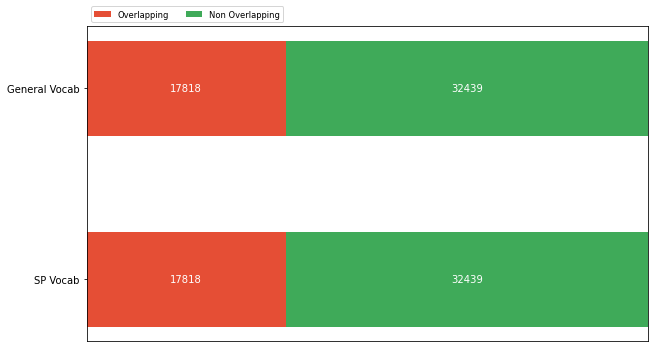

In [87]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Overlapping', 'Non Overlapping']
results = {'General Vocab': [overlap, len(general_words)-overlap],
           'SP Vocab': [overlap, len(sp_words)-overlap]}


def stack(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


fig, ax = stack(results, category_names)
plt.tight_layout()
fig.savefig('./corpus_tokenization_comparison/corpus_comparison.png', dpi=100)

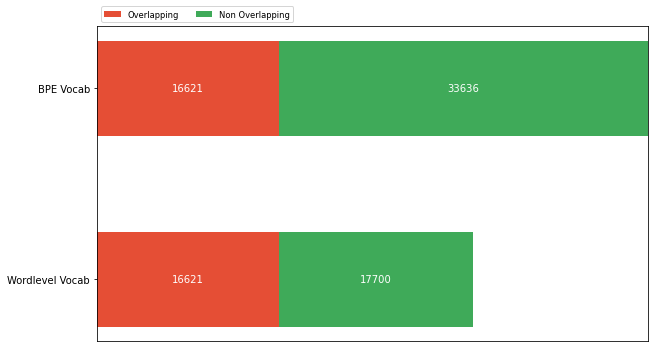

In [86]:
tok_results = {'BPE Vocab': [bpe_wordlevel_overlap, len(bpe_words)-bpe_wordlevel_overlap],
               'Wordlevel Vocab': [bpe_wordlevel_overlap, len(wordlevel_words)-bpe_wordlevel_overlap]}
fig, ax = stack(tok_results, category_names)
plt.tight_layout()
fig.savefig('./corpus_tokenization_comparison/tokenization_comparison.png', dpi=100)